<a href="https://colab.research.google.com/github/sushmasri4234/Internship/blob/main/25_04_25_AIML_Internship_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setup
sns.set(style='whitegrid')
plt.rcParams["figure.figsize"] = (8, 5)

# Load dataset
df = pd.read_csv("/content/sample_data/Titanic-Dataset.csv")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
# 1. Summary Statistics
print("=== Summary Statistics (Numerical) ===")
print(df.describe().T)

print("\n=== Median Values ===")
print(df.median(numeric_only=True))

print("\n=== Standard Deviations ===")
print(df.std(numeric_only=True))

print("\n=== Null Values ===")
print(df.isnull().sum())

=== Summary Statistics (Numerical) ===
             count        mean         std   min       25%       50%    75%  \
PassengerId  891.0  446.000000  257.353842  1.00  223.5000  446.0000  668.5   
Survived     891.0    0.383838    0.486592  0.00    0.0000    0.0000    1.0   
Pclass       891.0    2.308642    0.836071  1.00    2.0000    3.0000    3.0   
Age          714.0   29.699118   14.526497  0.42   20.1250   28.0000   38.0   
SibSp        891.0    0.523008    1.102743  0.00    0.0000    0.0000    1.0   
Parch        891.0    0.381594    0.806057  0.00    0.0000    0.0000    0.0   
Fare         891.0   32.204208   49.693429  0.00    7.9104   14.4542   31.0   

                  max  
PassengerId  891.0000  
Survived       1.0000  
Pclass         3.0000  
Age           80.0000  
SibSp          8.0000  
Parch          6.0000  
Fare         512.3292  

=== Median Values ===
PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            

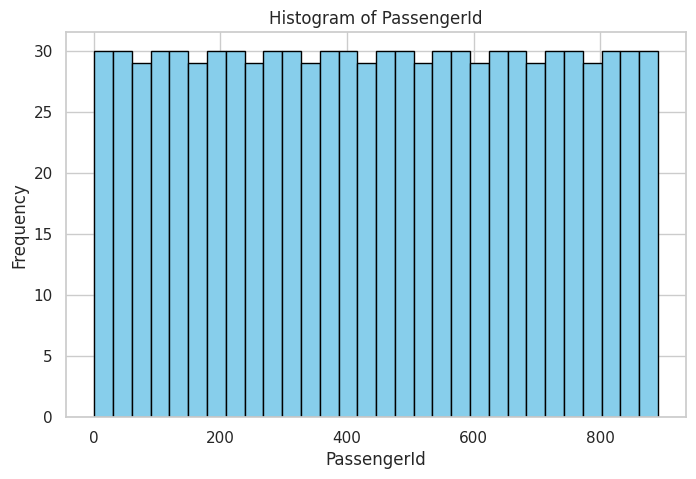

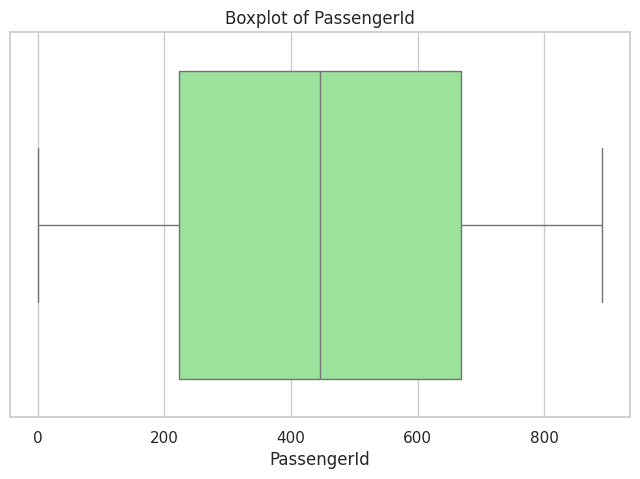

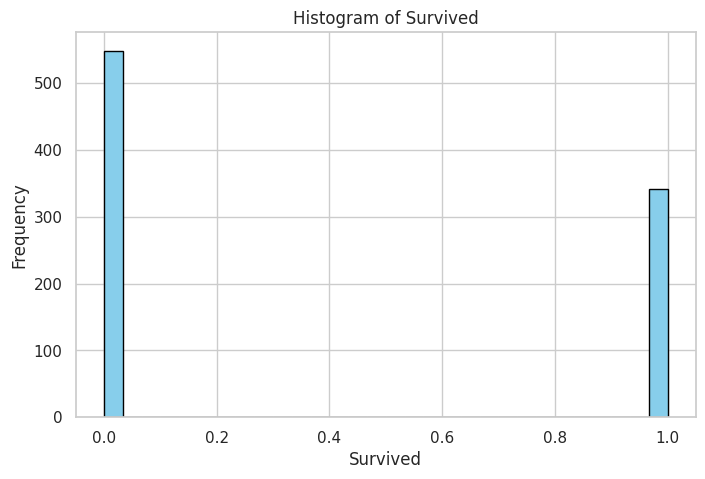

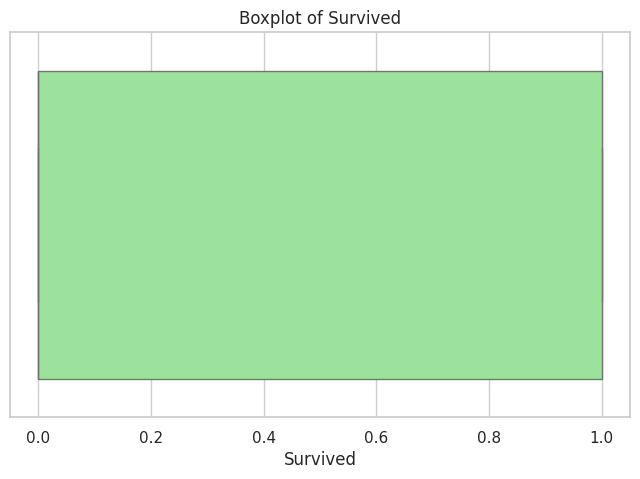

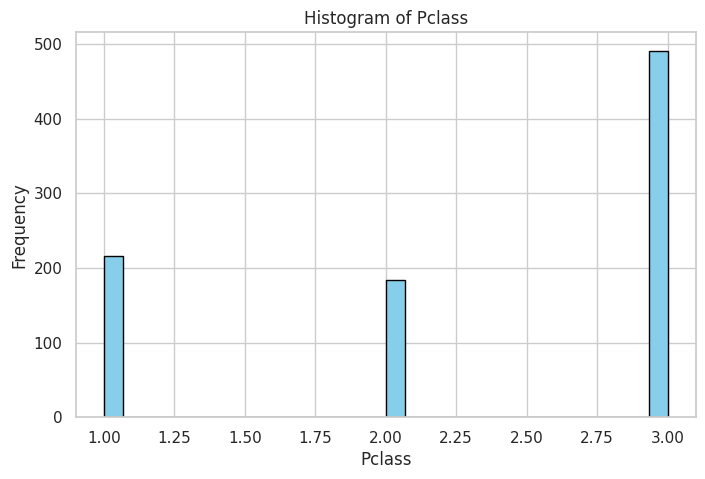

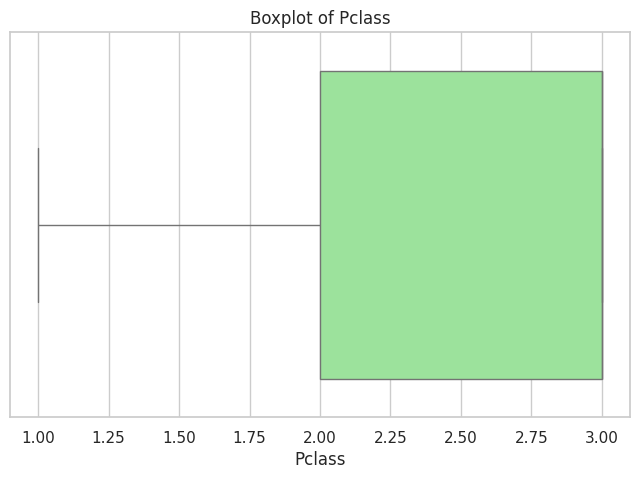

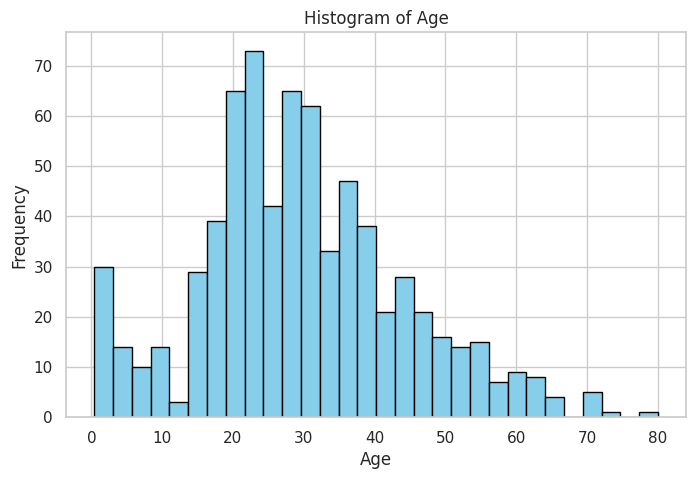

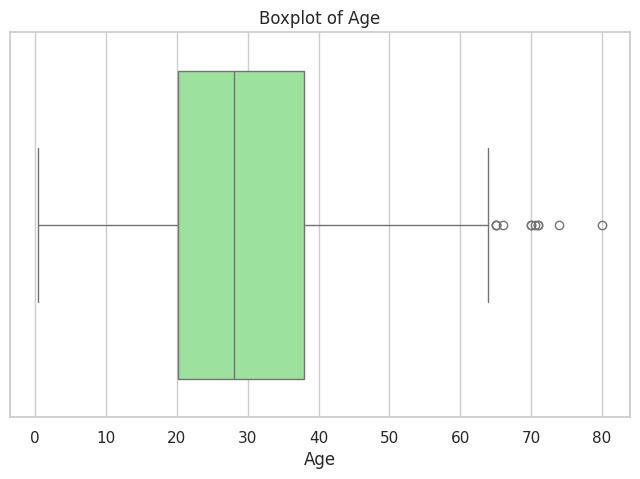

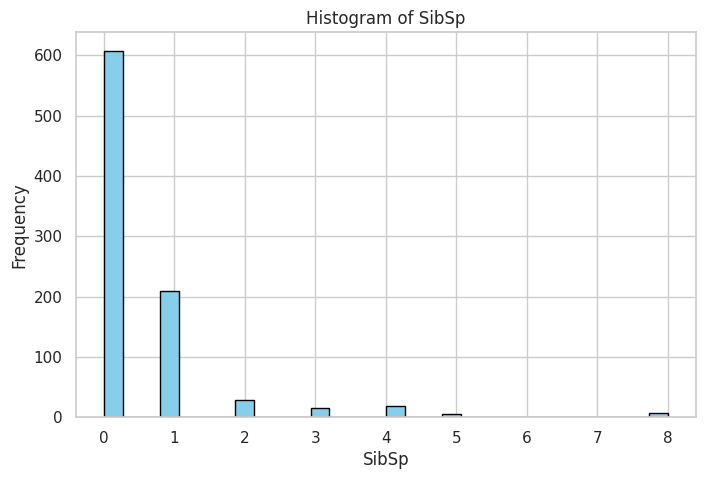

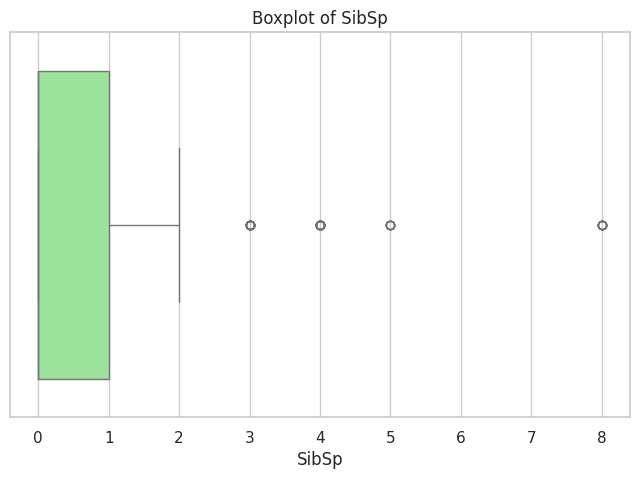

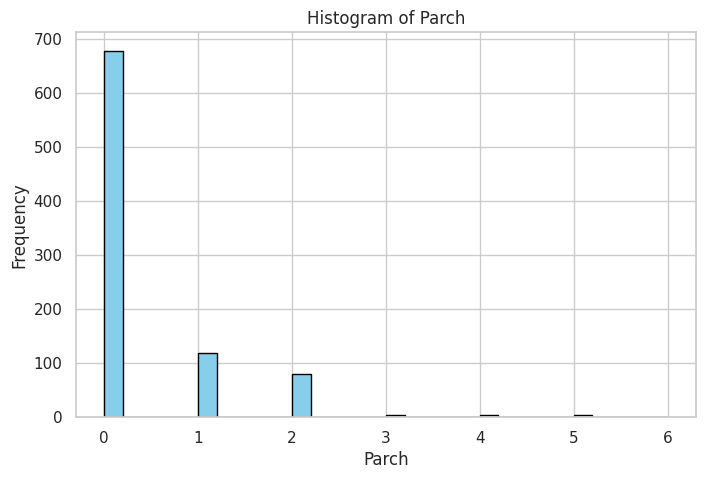

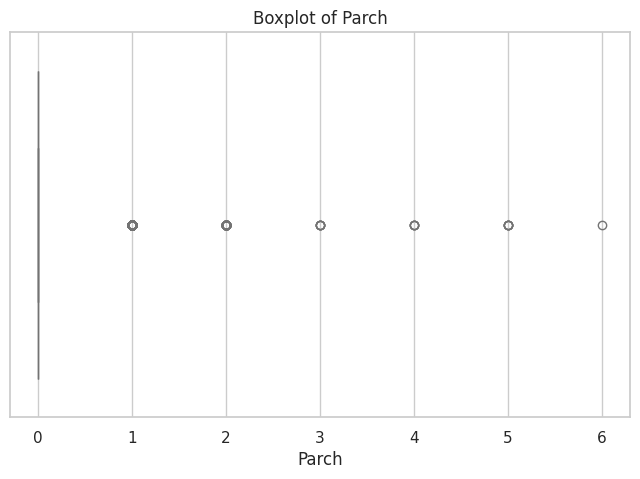

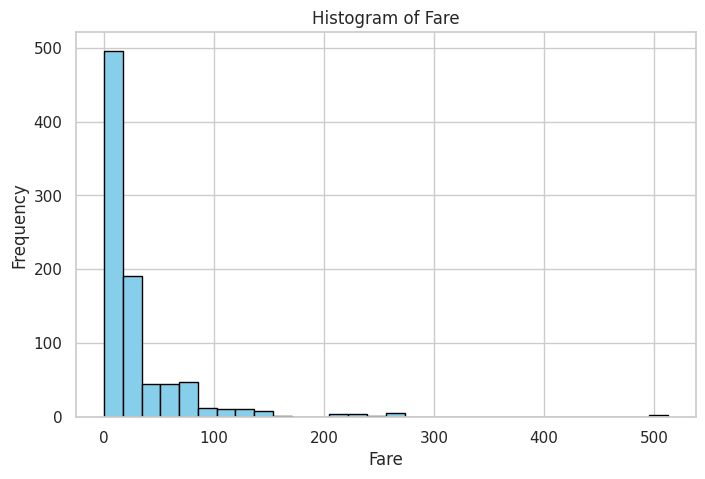

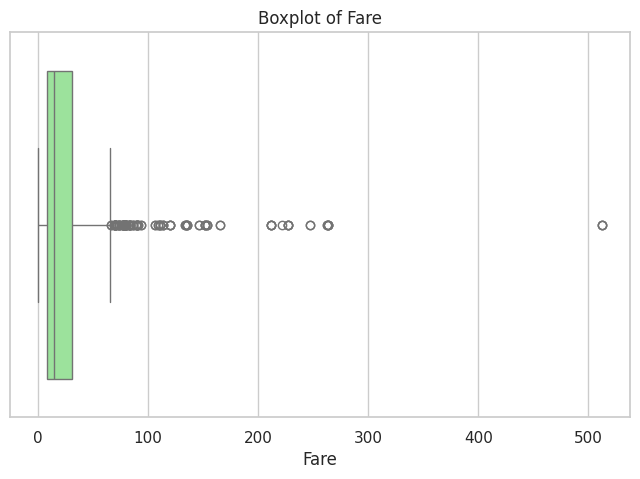

In [28]:
num_cols = df.select_dtypes(include=np.number).columns

for col in num_cols:
    plt.figure()
    df[col].hist(bins=30, color='skyblue', edgecolor='black')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

    plt.figure()
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f"Boxplot of {col}")
    plt.show()

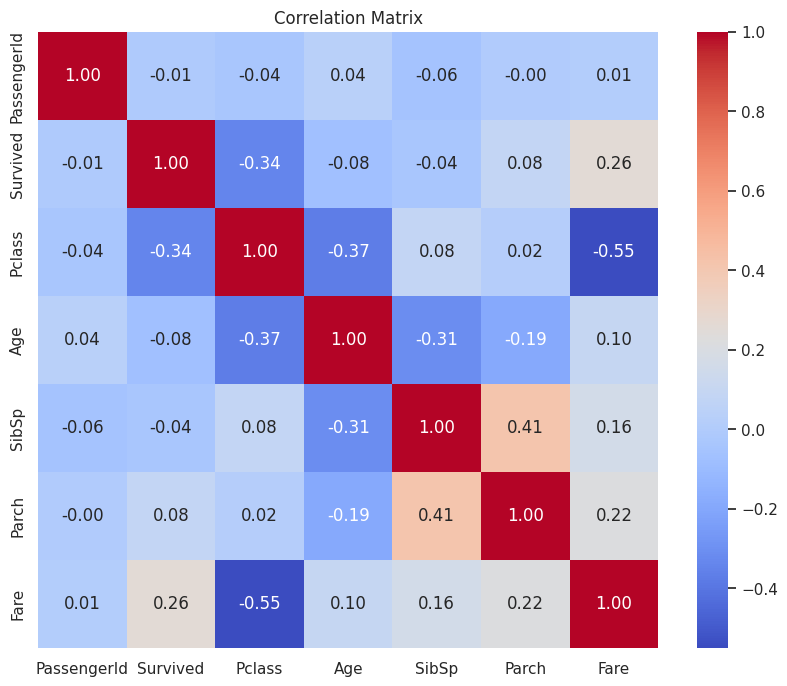

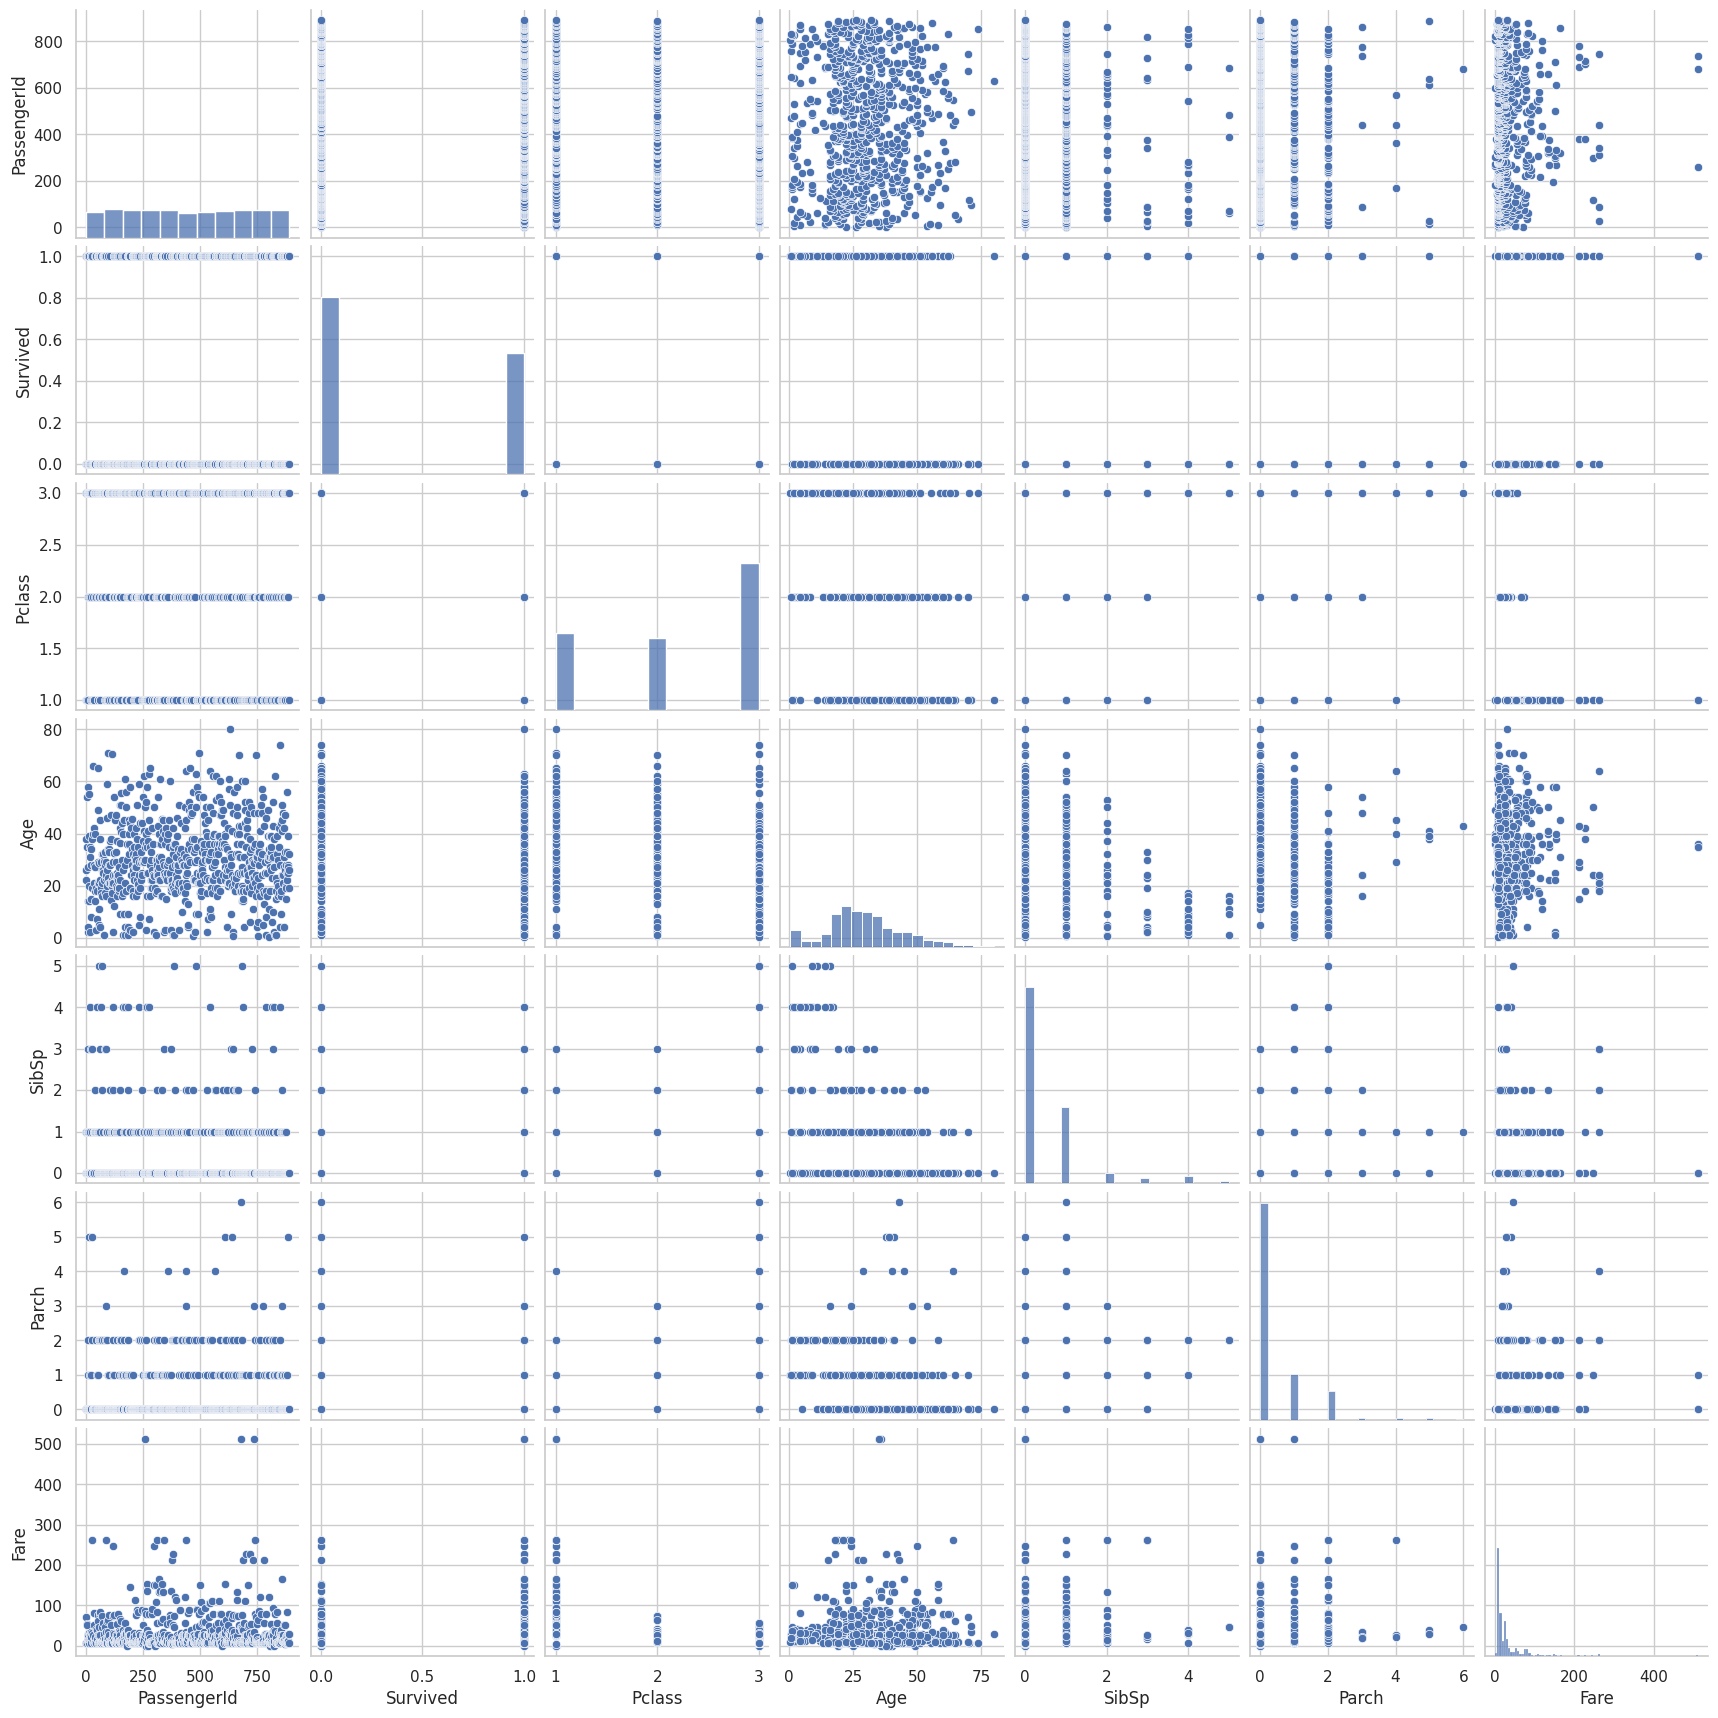

In [29]:
# 3. Correlation Matrix & Pairplot
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

sns.pairplot(df[num_cols].dropna(), diag_kind='hist')
plt.show()

In [30]:
# 4 & 5. Pattern Analysis & Inferences
print("\n=== Observations & Inferences ===")
if 'Fare' in df.columns:
    high_fare = df['Fare'].quantile(0.75)
    print(f"- Passengers paying above ₹{high_fare:.2f} tend to be in higher classes or have better survival chances.")

if 'Age' in df.columns:
    median_age = df['Age'].median()
    print(f"- Median age is {median_age:.1f}; check survival rate based on age groups.")

if 'Survived' in df.columns and 'Pclass' in df.columns:
    survival_by_class = df.groupby('Pclass')['Survived'].mean()
    print("- Survival rate by class:\n", survival_by_class)

if 'Sex' in df.columns and 'Survived' in df.columns:
    survival_by_gender = df.groupby('Sex')['Survived'].mean()
    print("- Survival rate by gender:\n", survival_by_gender)

print("\n EDA complete. All plots are displayed above.")



=== Observations & Inferences ===
- Passengers paying above ₹31.00 tend to be in higher classes or have better survival chances.
- Median age is 28.0; check survival rate based on age groups.
- Survival rate by class:
 Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
- Survival rate by gender:
 Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

 EDA complete. All plots are displayed above.
